In [5]:
import psycopg2 

# Postgres database parameters
db_params = {
    "dbname": "roaddata",
    "user": "user1",
    "password": "12345",
    "host": "db",
    "port": "5432"
}

In [6]:
import pandas as pd
try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()
   
    # Select data from the road_links table
    query = "SELECT * FROM road_links;"
    df = pd.read_sql(query, conn)
    
    # Commit the changes and close the connection
    cur.close()
    conn.commit()
    conn.close()

    print("Data read successfully.")
except (Exception, psycopg2.DatabaseError) as error:
    print(error)


/tmp/ipykernel_289/1666088594.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Data read successfully.


# Data Visualization

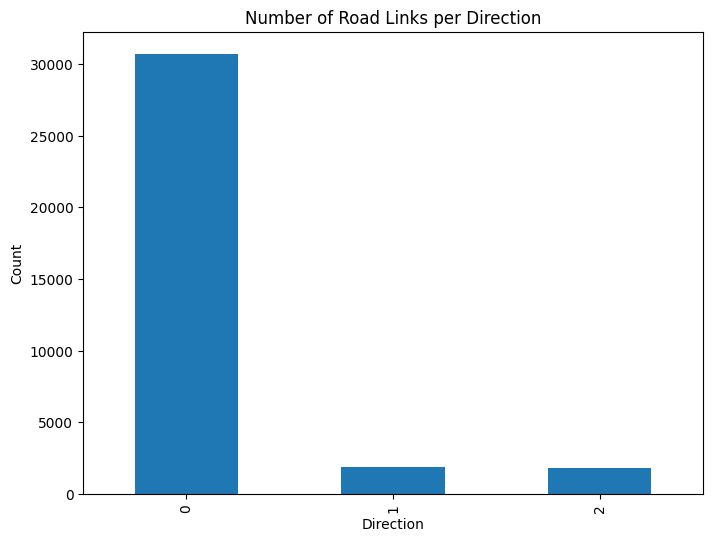

In [7]:
import matplotlib.pyplot as plt 

direction_counts = df["direction"].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
direction_counts.plot(kind="bar")
plt.title("Number of Road Links per Direction")
plt.xlabel("Direction")
plt.ylabel("Count")
plt.show()

Data have 3 unique value (0, 1 and 2), with Direction 0 having the most number of road links

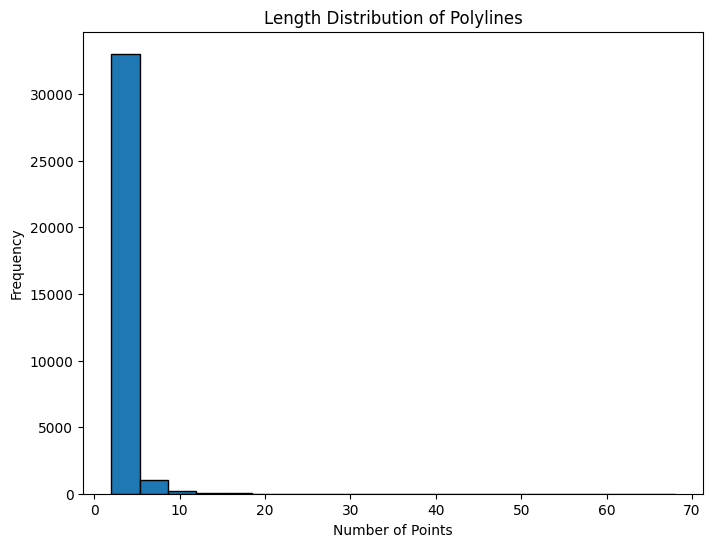

In [8]:
df["polyline_length"] = df["polyline"].apply(lambda x: len(x.split(", ")))

# Create a histogram of the polyline lengths
plt.figure(figsize=(8, 6))
plt.hist(df["polyline_length"], bins=20, edgecolor="k")
plt.title("Length Distribution of Polylines")
plt.xlabel("Number of Points")
plt.ylabel("Frequency")
plt.show()